In [1]:
from datascience import *
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7: Charts ##

In [2]:
full = Table.read_table('../Datasets/nc-est2014-agesex-res.csv')

# How to filter for only the columns we want 
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')

# How to rename columns 
simple = partial.relabeled(2, '2010').relabeled(3, '2014')

# Cleaning the data further
no_999 = simple.where('AGE', are.below(999))

# How to remove a specific sesion of data 
everyone = no_999.where('SEX', 0).drop('SEX') # This removes where the SEX column = 0 

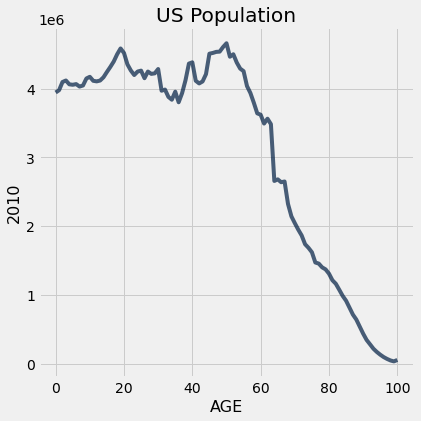

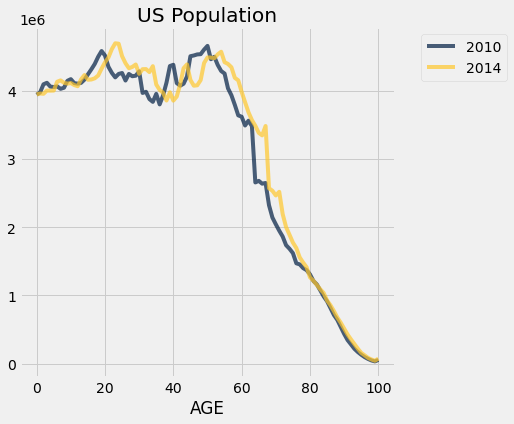

In [3]:
# Line plots 
everyone.plot('AGE', '2010')
plots.title('US Population');

# Line plots for different years 
everyone.plot('AGE')
plots.title('US Population'); # This will make a line for each age column

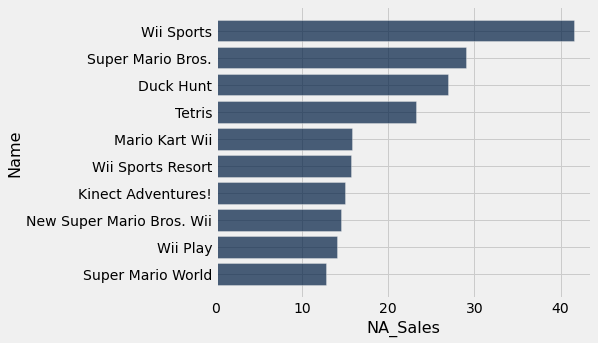

In [4]:
vgsales = Table.read_table('../Datasets/vgsales.csv')

# Sort Bar Chart Data in Order 
# Descending and Ascending order
top10_NA_Sales = vgsales.sort('NA_Sales', descending=True).take(np.arange(10))

# Bar Chart Creation
top10_NA_Sales.barh('Name', 'NA_Sales')

## Lecture 8: Histograms ##

bin,Years Since Release count
0,1
5,2089
10,5914
15,4689
20,2377
25,952
30,132
35,82
40,91
45,0


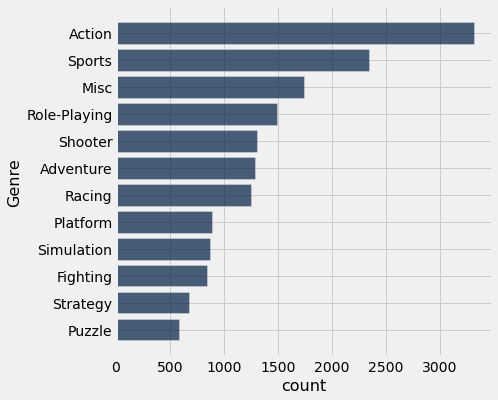

In [5]:
# How to group by categorical variables 
genre_dist = vgsales.select('Genre').group('Genre')

# How to make a descending bar chart by categorical variable 
genre_dist.sort('count', descending=True).barh('Genre')

# HOW TO BIN DATA 
    # Find the Min and Max values 
years_since = 2022 - vgsales.column('Year')
vgsales = vgsales.with_column('Years Since Release', years_since)
min(years_since), max(years_since)
    # Create an array based on the min and max of the data
my_bins = make_array(0, 5, 10, 15, 20, 30, 43) # Note: Include one more than the max, to include the max 
    # Put it all together 
binned_data = vgsales.bin('Years Since Release', bins = my_bins)
binned_data

# Alternate Bin data
vgsales.bin('Years Since Release', bins = np.arange(0, 50, 5))

2.038953880075948

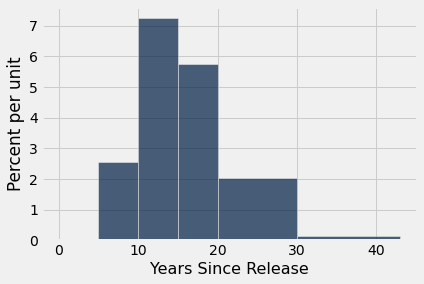

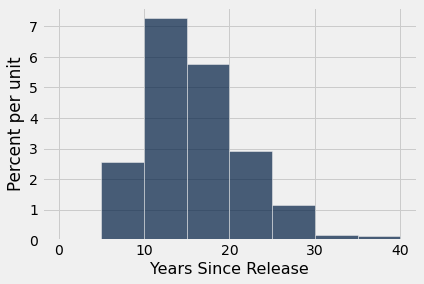

In [6]:
#Histograms 
vgsales.hist('Years Since Release', bins = my_bins)
vgsales.hist('Years Since Release', bins = np.arange(0, 45, 5))

# How to find the percentage of something in each bin 
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Years Since Release count')/sum(binned_data.column('Years Since Release count')))
binned_data

# How to find the height of a bin
    # Step 1: Calculate % of games in the [20, 30) bin
percent = binned_data.where('bin', 20).column('Percent').item(0)
    # Step 2: Calculate the width of the 20-30 bin
width = 30 - 20
    # Step 3: Area of rectangle = height * width
    #         --> height = percent / width
height = percent / width
height

## Lecture 9: Functions ##

In [7]:
def triple(x):
    return 3 * x # This doesn't care what type x is, it will triple it regardless

# The Apply Function 
sleep.apply(np.average, 'AverageSleep') # Applies the average function to every entry in the AverageSleep column

NameError: name 'sleep' is not defined

## Lecture 10: Groups ##

In [ ]:
insurance = Table.read_table('../Datasets/insurance_charges.csv')

# How to make a scatter plot
insurance.scatter('bmi', 'charges')

# How to make a scatter plot grouped by one variable
insurance.scatter('bmi', 'charges', group = 'smoker')

# How to filter a scatterplot 
insurance_smoker = insurance.where('smoker', 'yes')
insurance_smoker.scatter('bmi', 'charges')

# How to draw a line on a scatterplot
insurance_smoker.scatter('bmi', 'charges')
plots.plot([35, 35], [15000, 65000], color='red', lw=2);

# How to calculate mean 
nearby = insurance_smoker.where('bmi', are.between(34, 36))
nearby_mean = np.mean(nearby.column('charges'))

# How to plot the mean onto a scatter plot 
insurance_smoker.scatter('bmi', 'charges')
plots.scatter(35, nearby_mean, color='red', s=50); # s = size; makes the point a little bigger

# Creating a function to find the average bmi charge for specific bmis
def predict(bmi):
    '''uses smokers bmi to predict hospital charges'''
    nearby = insurance_smoker.where('bmi', are.between(bmi -1 , bmi + 1))
    return np.mean(nearby.column('charges'))

# Get an array of predicted values 
predicted_charges = insurance_smoker.apply(predict, 'bmi')

# Adds the array to the dataset
insurance_smoker = insurance_smoker.with_column(
    'Predicted charges', predicted_charges)

# Creates a scatterplot that compares the actual charges vs the predicted charges 
# Scatterplot that compares predicted values to actual values 
insurance_smoker.select(
    'charges', 
    'bmi', 
    'Predicted charges'
).scatter('bmi')

In [ ]:
cereal = Table.read_table('../Datasets/Cereal.csv')

# How to count how many of something are in a table 
cereal.group('Company')

# How to select categories and average by category 
cereal.select('Company', 'Calories').group('Company', np.average)

# How to average an entire table by group 
cereal.group('Company', np.average) # Note: Name is blank because "Name" = string class

In [ ]:
sleep = Table.read_table('../Datasets/SleepStudy.csv').select(
    'ClassYear',
    'LarkOwl',
    'GPA', 
    'PoorSleepQuality', 
    'AverageSleep', 
    'Drinks'
)

# How to create a line graph of averages
by_Drinks = sleep.group('Drinks', np.average)
# Title: "GPA, PoorSleepQuality, and AverageSleep Averages\n by Number of Drinks Consumed"
by_Drinks.drop(1,2).plot('Drinks') # NOTE: We have to drop the first two columns b/c they have non-numeric data

# How to group by two columsn 
sleep.group(['ClassYear','LarkOwl']).show() # Basic grouping and count

sleep.group(['ClassYear','LarkOwl'], np.average).show() # Grouping and averaging

# Pivot tables 
sleep.pivot('ClassYear', 'LarkOwl')
# Same as sleep.group(['ClassYear','LarkOwl']).show(), but puts Class Year as the column group

# How to average a pivot table 
sleep.pivot('ClassYear', 'LarkOwl', values='Drinks', collect=np.average)
# Takes the average drinks of the subgroups 

## Lecture 11: Joins

In [ ]:
# Creating the tables we will be working with 
drinks = Table().with_columns(
    'Drink', make_array('Milk Tea', 'Espresso', 'Latte', 'Espresso'),
    'Cafe', make_array('Asha', 'Strada', 'Strada', 'FSM'),
    'Price', make_array(5.5, 1.75, 3.25, 2)
)

discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)

# How to join 
combined = drinks.join('Cafe', discounts, 'Location')
# table_column1.join("column 1", table the column 2 is from, and "column 2 that will be joined to column 1")
combined # This is a left join 

# You can also join the same table together to duplicate certain columns (still a left join)
drinks.join('Cafe', drinks, 'Cafe')

In [ ]:
# Joins between three tables 
state_areas = Table.read_table('../Datasets/state-areas.csv')
state_pop = Table.read_table('../Datasets/state-population.csv')
state_abbrevs = Table.read_table('../Datasets/state-abbrevs.csv')

In [ ]:
# What were the top 10 states with the lowest population per square mile in the year 2000?
join1 = state_areas.join("state", state_abbrevs, "state")
join1

In [ ]:
# We want just for the year 2000
join2 = state_pop.where("year", are.equal_to(2000)).where("ages", "total")

total_states = join1.join("abbreviation", join2, "state/region")

In [ ]:
total_states["population per square mile"] = total_states["population"]/total_states["area (sq. mi)"]

In [ ]:
total_states.sort("population per square mile", descending = False)

## Class 12: Review 

Refer to class 12's document for additional notes 
- This is a really good resource!!